In [57]:
import logging
from ban.base.logging.log import SeoungSimLogger
from ban.config.JSONConfig import JSONConfig
import simpy
from simpy.events import NORMAL

from ban.base.helper.mobility_helper import MobilityHelper, MovementPhase
from ban.base.mobility import MobilityModel, BodyPosition

import matplotlib.pyplot as plt

env = simpy.Environment()

# 앞에 애들은 움직이지 않는 애들임
positions = tuple(BodyPosition)[7:]
mob_helper = MobilityHelper(env)

INITIAL_DELAY = int(JSONConfig.get_config("initial_delay"))

time = env.now

mobs = []
for pos in positions:
    mob = MobilityModel(pos)
    mobs.append(mob)
    mob_helper.add_mobility_list(mob)

mobs_pos = [[] for _ in range(len(positions))]

logger = SeoungSimLogger("PRINT", logging.CRITICAL)

def print_info(ev):
    for idx, mob in enumerate(mob_helper.mobility_list):
        pos = mob.get_position()
        mobs_pos[idx].append((round(pos.x, 5), round(pos.y, 5), round(pos.z, 5)))

    event = simpy.Event(env)
    event.env = env
    event._ok = True
    event.callbacks.append(print_info)
    
    logger.log(env.now, "logging")
    env.schedule(event, priority=NORMAL, delay=0.13)

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(mob_helper.do_walking)
env.schedule(event, priority=NORMAL, delay=0)

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(print_info)
env.schedule(event, priority=NORMAL, delay=0.5) # 999.4

def init_time(ev):
    global time

    time = env.now

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(init_time)
env.schedule(event, priority=NORMAL, delay=0)
env.run(until=1.5)

100%|██████████| 9/9 [00:00<00:00, 1469.34it/s]


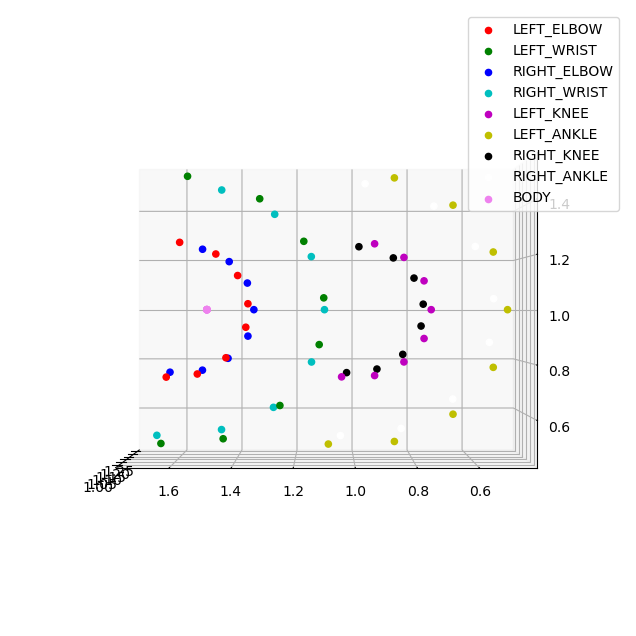

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm

# 임의의 mobs_pos 리스트 생성
# mobs_pos = [...]

colors = ('r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'violet', 'purple', 'lavender', 'darkorange', 'crimson', 'darkcyan', 'crimson')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=0, azim=180)

for i, mob in enumerate(tqdm(mobs_pos)):
    xs, ys, zs = zip(*mob)  # 각 점의 x, y, z 좌표 분리
    ax.scatter(xs, ys, zs, color=colors[i % len(colors)], alpha=1, label=str(positions[i]).split('.')[1])  # 점들 그리기


ax.legend()
plt.show()

In [59]:
static_positions = {str(positions[i]): mobs_pos[i] for i in range(len(positions))}

In [60]:
static_positions

{'BodyPosition.LEFT_ELBOW': [(1.02385, 1.57821, 1.24905),
  (1.00976, 1.45661, 1.20479),
  (0.9973, 1.38349, 1.125),
  (1.00802, 1.35095, 1.02179),
  (1.01388, 1.35852, 0.9353),
  (1.00862, 1.42322, 0.82322),
  (0.99164, 1.51449, 0.76508),
  (1.01997, 1.62179, 0.75095)],
 'BodyPosition.LEFT_WRIST': [(1.0477, 1.55642, 1.4981),
  (1.01951, 1.31321, 1.40958),
  (0.9946, 1.16699, 1.25),
  (1.01604, 1.1019, 1.04358),
  (1.02777, 1.11704, 0.87059),
  (1.01725, 1.24645, 0.64645),
  (0.98329, 1.42899, 0.53015),
  (1.03994, 1.64358, 0.5019)],
 'BodyPosition.RIGHT_ELBOW': [(1.18743, 1.64341, 0.7538),
  (1.22468, 1.5353, 0.75852),
  (1.18827, 1.4393, 0.80849),
  (1.22843, 1.37342, 0.89435),
  (1.20535, 1.35, 1.0),
  (1.20886, 1.37342, 1.10565),
  (1.22039, 1.4393, 1.19151),
  (1.22734, 1.5353, 1.24148)],
 'BodyPosition.RIGHT_WRIST': [(1.17486, 1.68682, 0.5076),
  (1.24936, 1.47059, 0.51704),
  (1.17654, 1.27861, 0.61698),
  (1.25687, 1.14685, 0.78869),
  (1.21069, 1.1, 1.0),
  (1.21771, 1.14685, 

In [61]:
import json

with open("./position_0.029.json", 'w', encoding="utf8") as f:
    json.dump(static_positions, f)

In [62]:
reversed_mobs_pos = mobs_pos[:]

for i in reversed_mobs_pos:
    i.reverse()

inversed_static_positions = {str(positions[i]): reversed_mobs_pos[i] for i in range(len(positions))}

In [63]:
inversed_static_positions

{'BodyPosition.LEFT_ELBOW': [(1.01997, 1.62179, 0.75095),
  (0.99164, 1.51449, 0.76508),
  (1.00862, 1.42322, 0.82322),
  (1.01388, 1.35852, 0.9353),
  (1.00802, 1.35095, 1.02179),
  (0.9973, 1.38349, 1.125),
  (1.00976, 1.45661, 1.20479),
  (1.02385, 1.57821, 1.24905)],
 'BodyPosition.LEFT_WRIST': [(1.03994, 1.64358, 0.5019),
  (0.98329, 1.42899, 0.53015),
  (1.01725, 1.24645, 0.64645),
  (1.02777, 1.11704, 0.87059),
  (1.01604, 1.1019, 1.04358),
  (0.9946, 1.16699, 1.25),
  (1.01951, 1.31321, 1.40958),
  (1.0477, 1.55642, 1.4981)],
 'BodyPosition.RIGHT_ELBOW': [(1.22734, 1.5353, 1.24148),
  (1.22039, 1.4393, 1.19151),
  (1.20886, 1.37342, 1.10565),
  (1.20535, 1.35, 1.0),
  (1.22843, 1.37342, 0.89435),
  (1.18827, 1.4393, 0.80849),
  (1.22468, 1.5353, 0.75852),
  (1.18743, 1.64341, 0.7538)],
 'BodyPosition.RIGHT_WRIST': [(1.25468, 1.47059, 1.48296),
  (1.24077, 1.27861, 1.38302),
  (1.21771, 1.14685, 1.21131),
  (1.21069, 1.1, 1.0),
  (1.25687, 1.14685, 0.78869),
  (1.17654, 1.27861,

In [64]:
import json

with open("./reversed_position_0.029.json", 'w', encoding="utf8") as f:
    json.dump(inversed_static_positions, f)

### load

In [67]:
import json

data = None
with open("./position_0.029.json", 'r', encoding="utf8") as f:
    data = json.load(f)

data

{'BodyPosition.LEFT_ELBOW': [[1.02385, 1.57821, 1.24905],
  [1.00976, 1.45661, 1.20479],
  [0.9973, 1.38349, 1.125],
  [1.00802, 1.35095, 1.02179],
  [1.01388, 1.35852, 0.9353],
  [1.00862, 1.42322, 0.82322],
  [0.99164, 1.51449, 0.76508],
  [1.01997, 1.62179, 0.75095]],
 'BodyPosition.LEFT_WRIST': [[1.0477, 1.55642, 1.4981],
  [1.01951, 1.31321, 1.40958],
  [0.9946, 1.16699, 1.25],
  [1.01604, 1.1019, 1.04358],
  [1.02777, 1.11704, 0.87059],
  [1.01725, 1.24645, 0.64645],
  [0.98329, 1.42899, 0.53015],
  [1.03994, 1.64358, 0.5019]],
 'BodyPosition.RIGHT_ELBOW': [[1.18743, 1.64341, 0.7538],
  [1.22468, 1.5353, 0.75852],
  [1.18827, 1.4393, 0.80849],
  [1.22843, 1.37342, 0.89435],
  [1.20535, 1.35, 1.0],
  [1.20886, 1.37342, 1.10565],
  [1.22039, 1.4393, 1.19151],
  [1.22734, 1.5353, 1.24148]],
 'BodyPosition.RIGHT_WRIST': [[1.17486, 1.68682, 0.5076],
  [1.24936, 1.47059, 0.51704],
  [1.17654, 1.27861, 0.61698],
  [1.25687, 1.14685, 0.78869],
  [1.21069, 1.1, 1.0],
  [1.21771, 1.14685, 

In [68]:
import json

i_data = None
with open("./reversed_position_0.029.json", 'r', encoding="utf8") as f:
    i_data = json.load(f)

i_data

{'BodyPosition.LEFT_ELBOW': [[1.01997, 1.62179, 0.75095],
  [0.99164, 1.51449, 0.76508],
  [1.00862, 1.42322, 0.82322],
  [1.01388, 1.35852, 0.9353],
  [1.00802, 1.35095, 1.02179],
  [0.9973, 1.38349, 1.125],
  [1.00976, 1.45661, 1.20479],
  [1.02385, 1.57821, 1.24905]],
 'BodyPosition.LEFT_WRIST': [[1.03994, 1.64358, 0.5019],
  [0.98329, 1.42899, 0.53015],
  [1.01725, 1.24645, 0.64645],
  [1.02777, 1.11704, 0.87059],
  [1.01604, 1.1019, 1.04358],
  [0.9946, 1.16699, 1.25],
  [1.01951, 1.31321, 1.40958],
  [1.0477, 1.55642, 1.4981]],
 'BodyPosition.RIGHT_ELBOW': [[1.22734, 1.5353, 1.24148],
  [1.22039, 1.4393, 1.19151],
  [1.20886, 1.37342, 1.10565],
  [1.20535, 1.35, 1.0],
  [1.22843, 1.37342, 0.89435],
  [1.18827, 1.4393, 0.80849],
  [1.22468, 1.5353, 0.75852],
  [1.18743, 1.64341, 0.7538]],
 'BodyPosition.RIGHT_WRIST': [[1.25468, 1.47059, 1.48296],
  [1.24077, 1.27861, 1.38302],
  [1.21771, 1.14685, 1.21131],
  [1.21069, 1.1, 1.0],
  [1.25687, 1.14685, 0.78869],
  [1.17654, 1.27861,

In [2]:
import json

data, i_data = None, None
with open("./position_0.029.json", 'r', encoding="utf8") as f:
    data = json.load(f)

with open("./reversed_position_0.029.json", 'r', encoding="utf8") as f:
    i_data = json.load(f)

positions = [data, i_data]